# Ford GoBike System Data
## by Victor Nomwesigwa

## Investigation Overview
What are the main features of interest in the dataset?
- How long does the average trip take?
- Is the trip duration affected by weather( months/seasons)?
- Does the above depend on if a user is a subscriber or customer?

## Dataset Overview

> The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_bikes_master.csv', encoding='utf-8')

In [3]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_time_month,start_time_weekday,start_time_day,start_time_hour,start_time_month_no,end_time_month,end_time_weekday,end_time_day,end_time_hour,end_time_month_no
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988.0,Male,...,February,Wed,28,23,2,March,Thu,1,0,3
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,1987.0,Male,...,February,Wed,28,23,2,February,Wed,28,23,2
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,1986.0,Female,...,February,Wed,28,18,2,February,Wed,28,23,2
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,1981.0,Male,...,February,Wed,28,18,2,February,Wed,28,23,2
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.608,1976.0,Female,...,February,Wed,28,23,2,February,Wed,28,23,2


## Visualization 1

> How long does the average trip take?

Text(0, 0.5, 'Bike Trips')

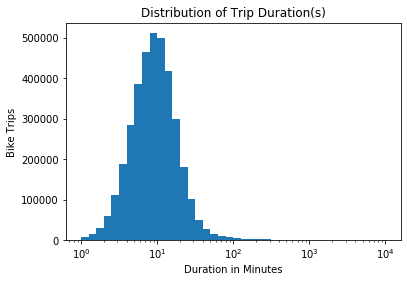

In [4]:
# log transformation
df['duration_min'] = df['duration_sec']/60
bin_edges = 10**np.arange(0, 4+0.1 , 0.1)  
# 0 means 10^0 is the start point, 4 means 10^4 is the ending point , 10^0.1 is the gap
# do i need to increase the max tick
ticks = [0.1 , 0.4 , 1 , 4 , 10 , 40 , 100 , 400]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min', bins = bin_edges);
plt.title('Distribution of Trip Duration(s)')
plt.xticks(ticks,labels)
plt.xlabel('Duration in Minutes')
plt.xscale('log');
plt.ylabel('Bike Trips')

### Conclusion

The plot suggest a normal distribution of trips and that most people take short trips of about 10 min.

## Visualization 2

> Is the trip duration affected by weather( months/seasons)?

Text(0.5, 1.0, 'Relationship between duration in min and months')

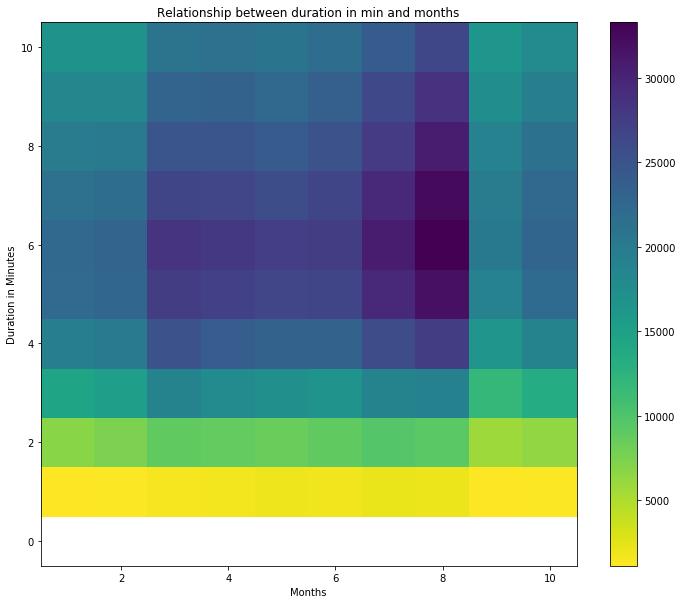

In [5]:
plt.figure(figsize = [12, 10])
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = df, x = 'start_time_month_no', y = 'duration_min',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Months')
plt.ylabel('Duration in Minutes')
plt.title('Relationship between duration in min and months')

### Observation 
From the heat map above, we notice that most trips are taken at the start of June and end of August. Which suggests that the longest trip durations happen during the summer. We can further explore this by taking a look at the distribution of different weather seasons i.e. Spring, Summer, Autumn and Winter.

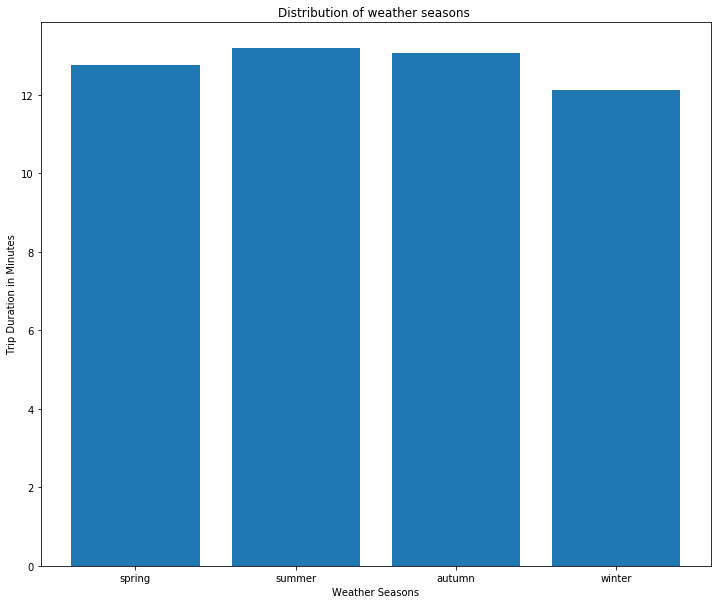

In [6]:
spring = df.query('start_time_month_no in ["3" , "4" , "5"]' ).duration_min.mean ()
summer = df.query('start_time_month_no in ["6" , "7" , "8"] ').duration_min.mean()
autumn = df.query('start_time_month_no in ["9" , "10" , "11"]').duration_min.mean()
winter = df.query('start_time_month_no in ["12" , "1" , "2"]').duration_min.mean()

plt.figure(figsize = [12, 10])
plt.bar(['spring','summer','autumn','winter'],[spring , summer , autumn , winter] )
plt.title('Distribution of weather seasons ')
plt.xlabel('Weather Seasons')
plt.ylabel('Trip Duration in Minutes');

### Conclusion

We can conclude that the longest trip durations happen during summer. We also observe that the differences in trip duration between the other seasons does not change much. This may be attributed to the weather in San Francisco which is mostly warm and dry during Summer (Jun–Aug), with chilly fog mornings and evenings and Winter (Dec–Feb) is cool and rainy.

## Visualization 3

> Does the impact of weather on trip duration depend on if a user is a subscriber or customer?

<Figure size 864x720 with 0 Axes>

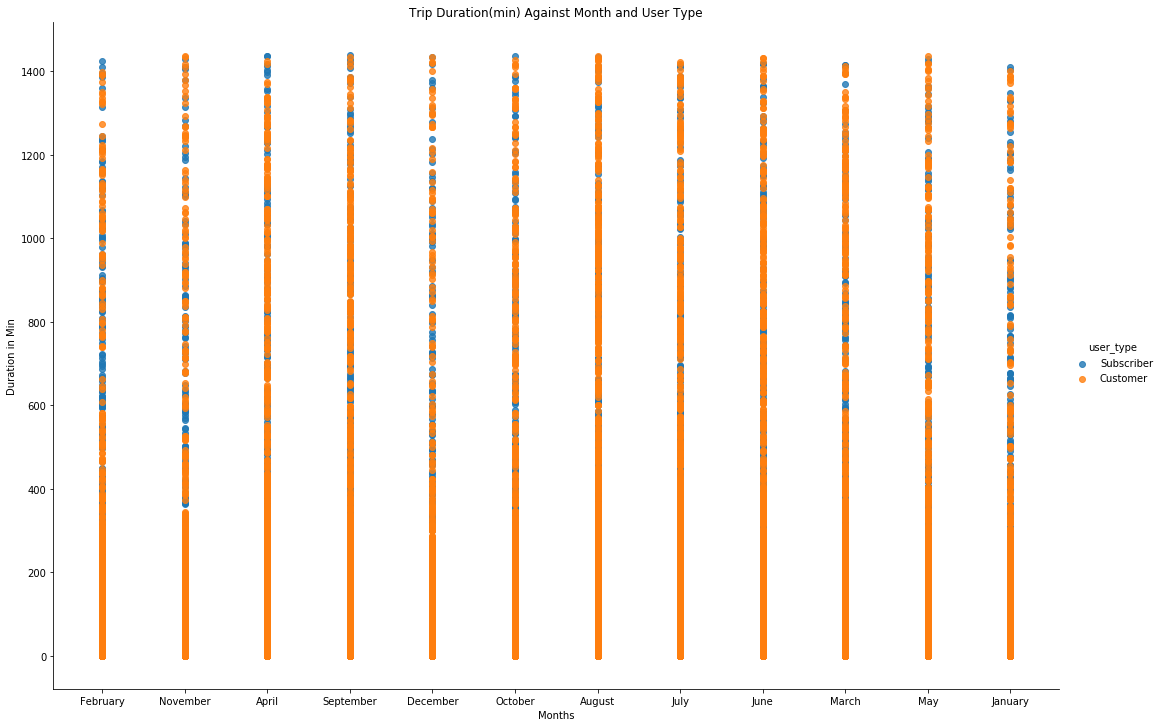

In [7]:
# multivariate plot of duration_min by month, and user type
plt.figure(figsize = [12, 10])
g = sb.FacetGrid( data = df, hue = 'user_type',height = 10, aspect=1.5 )
g = g.map(sb.regplot, 'start_time_month' ,'duration_min' , fit_reg = False);
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Months')
plt.ylabel('Duration in Min');

### Conclusion 

The above plot suggests that there are far more customers than subscribers. Therefore, it is safe to conclude that user type does not impact trip duration. However, we also observe that subscribed users rent bikes for longer trips of above 300 min.